# House Prices: Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import time
from sklearn import preprocessing
from scipy.stats import skew
from scipy import stats
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
%matplotlib inline

In [3]:
# Loading data train
data_train = pd.read_csv('train.csv')
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Loading data test
data_test = pd.read_csv('test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Read data information
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Data statistics
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Feature selection

In [7]:
# Filter numerical features and categorical feature
numerical_features = data_test.select_dtypes(include=["float","int","bool"]).columns.values
categorical_features = data_train.select_dtypes(include=["object"]).columns.values

In [8]:
print(numerical_features)

['LotFrontage' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'BsmtFullBath' 'BsmtHalfBath' 'GarageYrBlt' 'GarageCars'
 'GarageArea']


In [9]:
print(categorical_features)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


In [10]:
#num_fea_data = data_train.select_dtypes(include=["float","int","int32","int64"])

In [11]:
#mis_data(num_fea_data).head()

In [12]:
#log transforming sale price to transform it into gaussian distribution
target = np.log(data_train.SalePrice)

## Preprocessing

In [13]:
# Missing values
def mis_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)
    return pd.concat([total,percent], axis = 1, keys = ['Total','Percent'])

In [14]:
mis_data_stat = mis_data(data_train)
print(mis_data_stat[0:10]) #['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']

              Total  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageCond       81     5.55
GarageType       81     5.55
GarageYrBlt      81     5.55
GarageFinish     81     5.55


In [15]:
# Filter feature have Nan value
list_feature = mis_data_stat.index
lst_name = []
for i in list_feature:
    if mis_data_stat['Total'][i] > 0:
        lst_name.append(i)

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[10, 14, 0, 180]

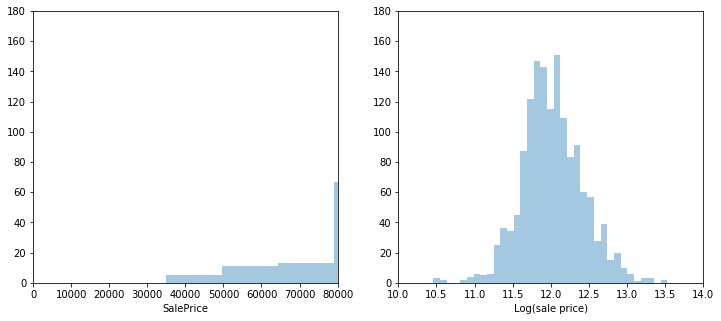

In [16]:
# Set up the figure
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data_train['SalePrice'],kde = False)
plt.axis([0,80000,0,180])
plt.subplot(122)
sns.distplot(np.log(data_train['SalePrice']),kde = False)
plt.xlabel('Log(sale price)')
plt.axis([10,14,0,180])

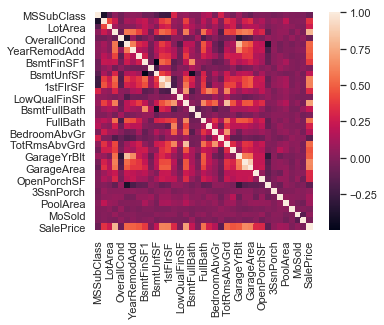

In [17]:
corr = data_train.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#fig = plt.figure()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [18]:
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list[0:6]

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [35]:
data_train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [37]:
#pivot table of Overall Quality & Sale price
quality_pivot = data_train.pivot_table(index= 'OverallQual', values= 'SalePrice')

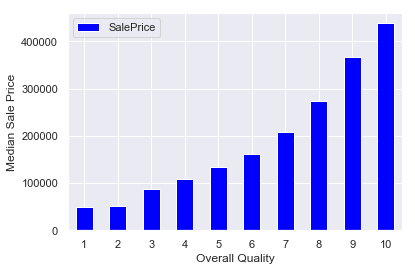

In [39]:
#plotting the pivot table
quality_pivot.plot(kind = 'bar', color = 'blue')

plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

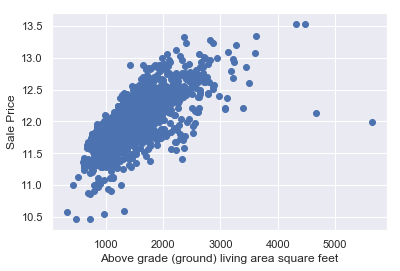

In [40]:
#Analysing the feature - ground living area 
plt.scatter(x = data_train['GrLivArea'], y = target)

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

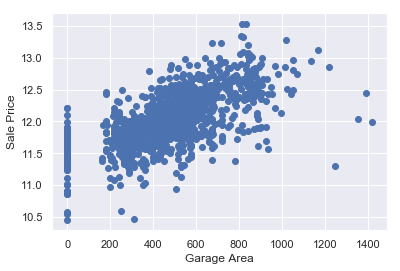

In [41]:
#Analysing the feature - garage area
plt.scatter(x = data_train['GarageArea'], y = target)

plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [49]:
# Removing the outliers
data_train = data_train[data_train['GarageArea']<1200]

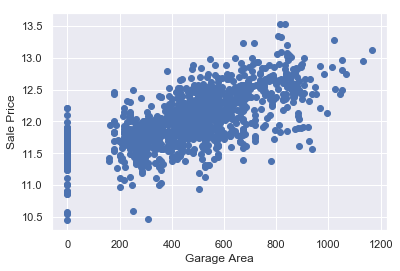

In [51]:
# After removing the outliers
plt.scatter(x = data_train['GarageArea'], y = np.log(data_train.SalePrice))

plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [42]:
# Checking the null values 
print('Unique values are:', data_train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [45]:
# Analysing the categorical data
categoricals = data_train.select_dtypes(exclude= [np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [46]:
print ("Original: \n") 
print (data_train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [47]:
# One-hot encoding to convert the categorical data into integer data
data_train['enc_street'] = pd.get_dummies(data_train.Street, drop_first= True)
data_test['enc_street'] = pd.get_dummies(data_test.Street, drop_first= True)

In [48]:
print('Encoded: \n')
print(data_train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


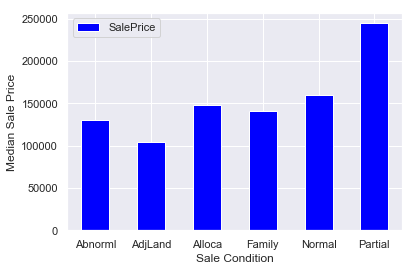

In [28]:
# Analysing the feature - Sale Condition
condition_pivot = data_train.pivot_table(index= 'SaleCondition', values= 'SalePrice', aggfunc= np.median)

condition_pivot.plot(kind= 'bar', color = 'blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [29]:
def encode(x): 
    if x == 'Partial':
        return 1
    else:
        return 0

In [52]:
#Treating partial as one class and other all sale condition as other
data_train['enc_condition'] = data_train.SaleCondition.apply(encode)
data_test['enc_condition'] = data_test.SaleCondition.apply(encode)

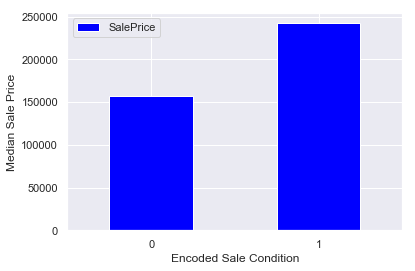

In [55]:
condition_pivot = data_train.pivot_table(index= 'enc_condition', values= 'SalePrice', aggfunc= np.median)

condition_pivot.plot(kind= 'bar', color = 'blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [56]:
# Handling he missing values by interpolation
data = data_train.select_dtypes(include= [np.number]).interpolate().dropna()

In [57]:
# Verifying missing values
sum(data.isnull().sum()!=0)

0

In [58]:
# Log transforming the target variable to improve the linearity of the regression
y = np.log(data_train.SalePrice)
# Dropping the target variable and the index from the training set
X = data.drop(['SalePrice', 'Id'], axis = 1)

In [59]:
#splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [60]:
# linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [61]:
# Fitting linear regression on the data
model = lr.fit(X_train,y_train)

In [62]:
# R square value
print('R square is : {}'.format(model.score(X_test,y_test)))

R square is : 0.8968167196265289


In [63]:
# Predicting on the test set
predictions = model.predict(X_test)

In [64]:
# Evaluating the model on mean square error
from sklearn.metrics import mean_squared_error, accuracy_score

In [65]:
print('RMSE is {}'.format(mean_squared_error(y_test, predictions))) 

RMSE is 0.01737499887167781


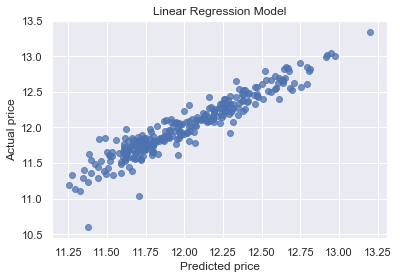

In [66]:

actual_values = y_test
plt.scatter(predictions, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

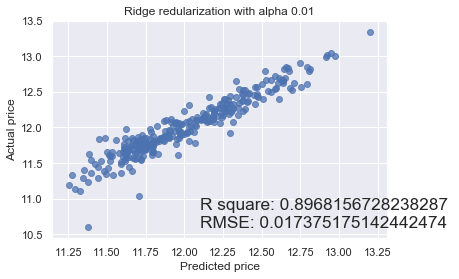

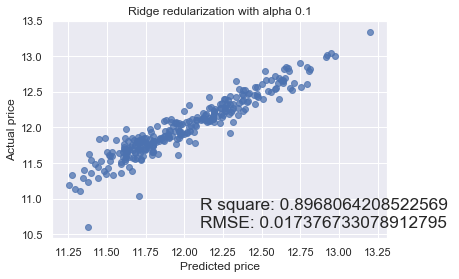

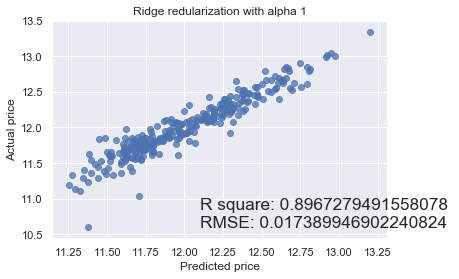

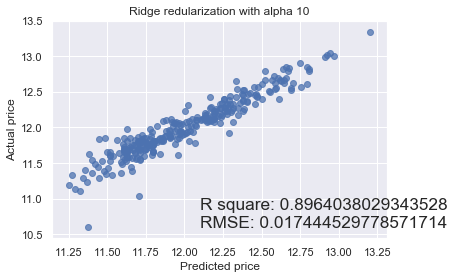

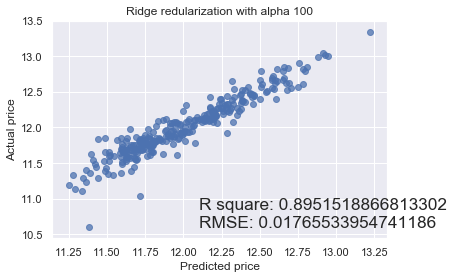

In [75]:
# Linear regression with L2 regularization
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha= 0.75, c= 'b')
    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Ridge redularization with alpha {}'.format(alpha))
    overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
    plt.show()